### 필수과제1
- kmeans의 군집화의 inertia값이 의미하는 것이 어떤 것인지?
- 구체적으로 개념을 정리하고, 실제 시각화 코드를 통해서 인사이트를 도출해보기!

### inertia value
- 군집의 응집도: 각 중심점에서 군집의 데이터 간 거리의 합
- K-means를 수행하기 위한 클러스터의 개수를 정하기 위해 사용되는 지표
- inertia 값이 작을수록, 군집의 개수(k)가 적을수록 좋은 모델이다.
- 그러나 inertia 값과 군집의 개수(k)는 tradeoff 관계: 군집의 개수가 증가할수록 inertia 값이 감소한다.
- 적절한 k값을 찾기 위해서 inertia 값을 이용하는 방법이 elbow method이다.

### 시각화 코드
- iris 데이터셋을 사용

In [1]:
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
iris_df = datasets.load_iris()

In [3]:
labels = pd.DataFrame(iris_df.target, columns=["labels"])
data = pd.DataFrame(iris_df.data, columns=["Sepal_length", "Sepal_width", 
                                           "Petal_length", "Petal_width"])
data = pd.concat([data, labels], axis=1)
data

,Sepal_length,Sepal_width,Petal_length,Petal_width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
def change_n_clusters(n_clusters, data):
    sum_of_squared_distance=[]
    for n_cluster in n_clusters:
        kmeans = KMeans(n_clusters = n_cluster)
        kmeans.fit(data)
        sum_of_squared_distance.append(kmeans.inertia_)
        print(kmeans.inertia_)
        
    plt.figure(1, figsize=(15,8))
    plt.plot(n_clusters, sum_of_squared_distance, '*')
    plt.plot(n_clusters, sum_of_squared_distance, '-', alpha=0.5)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')

179.05358288770051
87.22062785114045
66.84213762993764
50.28098757763974
42.91270454545454
35.48785672459586
31.52204674069892


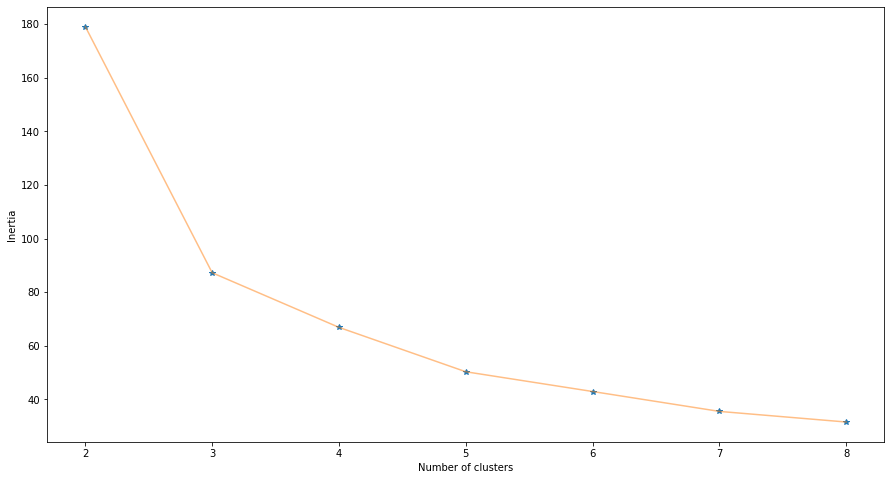

In [5]:
n_clusters = [2,3,4,5,6,7,8]
change_n_clusters(n_clusters, data)

- inertia 데이터를 시각화한 결과, 군집의 개수가 증가할수록 inertia 값이 감소한다는 사실을 확인할 수 있다.
- elbow method에서는 적절한 k값을 찾기 위해서 inertia 값이 급격히 감소한 지점을 찾지만, 결정하기 애매한 경우가 있다.
- 이때는 다른 평가 지표를 함께 이용하는 것도 좋은 방법이다.